### Student Information
Name: 張宜禎

Student ID: 105062208

GitHub ID: pclightyear

Kaggle name: Yi-Zhen Zhang (pclightyear)

Kaggle private scoreboard snapshot:

[Snapshot](img/kaggle_private_scoreboard_snapshot.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

---

---

# Part 1: Take Home Exercises

In [1]:
# libraries import
import os
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import time

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


#### Answer here

In [7]:
N = 30
# Prepare BOW matrix
train_vect = CountVectorizer(max_features=N)
train_BOW_top_30 = train_vect.fit_transform(train_df['text'])

test_vect = CountVectorizer(max_features=N)
test_BOW_top_30 = test_vect.fit_transform(test_df['text'])

In [8]:
def get_term_frequencies(matrix):
    term_freq = []

    for t in matrix.T:
        term_freq.append(t.toarray().sum())

    return term_freq

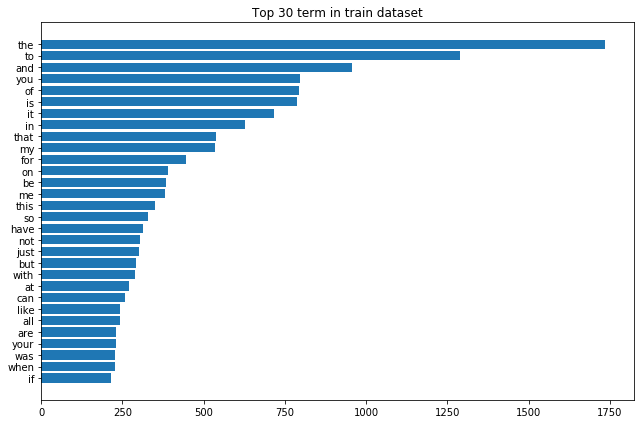

In [9]:
# Plot word frequency for Top 30 words in train dataset.
index = np.arange(N)
    
train_top_30_term_freq = get_term_frequencies(train_BOW_top_30)
train_top_30_term = []

for i in np.argsort(train_top_30_term_freq)[::-1]:
    train_top_30_term.append(train_vect.get_feature_names()[i])
y = np.sort(train_top_30_term_freq)[::-1]

fig = plt.figure(figsize=(9, 6))
ax = fig.subplots()

ax.set_title('Top 30 term in train dataset')
ax.barh(index, y, align='center', color='tab:blue')
ax.set_yticks(index)
ax.set_yticklabels(train_top_30_term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()    

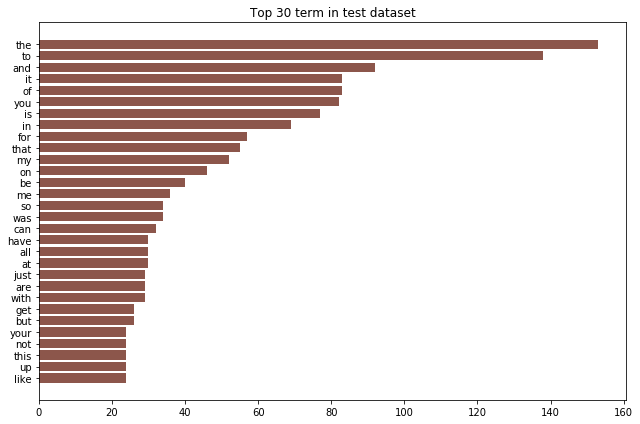

In [10]:
# Plot word frequency for Top 30 words in test dataset.
index = np.arange(N)
    
test_top_30_term_freq = get_term_frequencies(test_BOW_top_30)
test_top_30_term = []

for i in np.argsort(test_top_30_term_freq)[::-1]:
    test_top_30_term.append(test_vect.get_feature_names()[i])
y = np.sort(test_top_30_term_freq)[::-1]

fig = plt.figure(figsize=(9, 6))
ax = fig.subplots()

ax.set_title('Top 30 term in test dataset')
ax.barh(index, y, align='center', color='tab:brown')
ax.set_yticks(index)
ax.set_yticklabels(test_top_30_term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()    

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

#### Answer here

In [11]:
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_1000 = TFIDF_1000.transform(train_df['text'])

train_data_TFIDF_1000.shape

(3613, 1000)

In [12]:
feature_names_1000 = TFIDF_1000.get_feature_names()
feature_names_1000[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### Answer here
As mentioned in the class, the Decision Tree classifier has issues of underfitting and overfitting. In the result, we can see that there is a huge accuracy gap between training data and testing data. In this case, our model has the issue of overfitting.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

#### Answer here

In [13]:
# Use the same features we use in training decision tree classifier to train naive bayes classifier.
# Generate BOW features based on Top 500 word with most frequency
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

train_data_BOW_features_500.shape

(3613, 500)

In [14]:
from sklearn.naive_bayes import MultinomialNB

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [15]:
# build and train model
NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train, y_train)

# get predicted result on test data
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [16]:
# accuracy evaluation
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.72


In [17]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



In [18]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here
training accuracy: DT > NB
testing accuracy: NB > DT
As metioned in exercise 3, the Decision Tree model often has the issue of overfitting. Although the Navie Bayes model get lower accuracy than Decision Tree model in train dataset, it acctually get better result in testing dataset.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

#### Answer here

In [54]:
# import the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/exercise_6_training_log.csv")
training_log.head()

,epoch,acc,loss,val_acc,val_loss
0,0,0.364794,1.329159,0.420749,1.279272
1,1,0.624135,1.013608,0.639769,0.951016
2,2,0.790202,0.596971,0.717579,0.764822
3,3,0.853584,0.410675,0.740634,0.750096
4,4,0.884030,0.319464,0.711816,0.796539


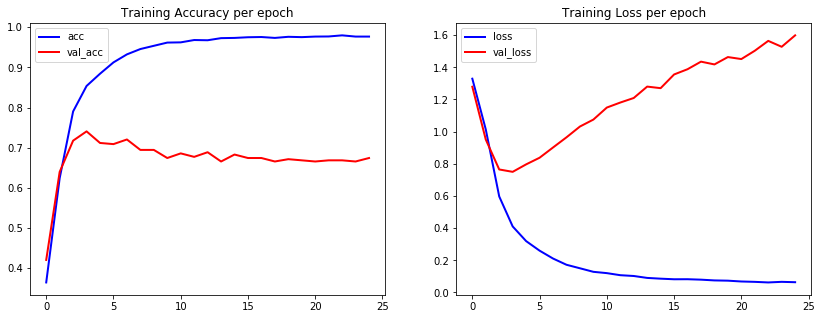

In [67]:
plt.figure(figsize=(14, 5))

# plot training and validation accuracy per epoch
plt.subplot(121)
plt.plot('epoch', 'acc', data=training_log, marker='', color='b', linewidth=2)
plt.plot('epoch', 'val_acc', data=training_log , marker='', color='r', linewidth=2)

plt.title('Training Accuracy per epoch')
plt.legend()

# plot training and validation loss per epoch
plt.subplot(122)
plt.plot('epoch', 'loss', data=training_log, marker='', color='b', linewidth=2)
plt.plot('epoch', 'val_loss', data=training_log , marker='', color='r', linewidth=2)

plt.title('Training Loss per epoch')
plt.legend()

plt.show()  

#### Observation
During the training process, the model tries to minimize the loss and maximize the accuracy in training dataset, as the blue lines shown in the figures above. On the other hand, in the testing dataset, we can see that the accuracy quickly goes up in the first few epoch, which is a sign of underfitting. After the first few epoch, although the model performs better and better in the trainging dataset, the accuracy goes down in the testing dataset, which is a sign of overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

#### Answer here
1. summarize/average/weighted the word vectors in the sentence.
2. concatenate the word vectors together.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

#### Answer here

In [68]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "data/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [69]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15

angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

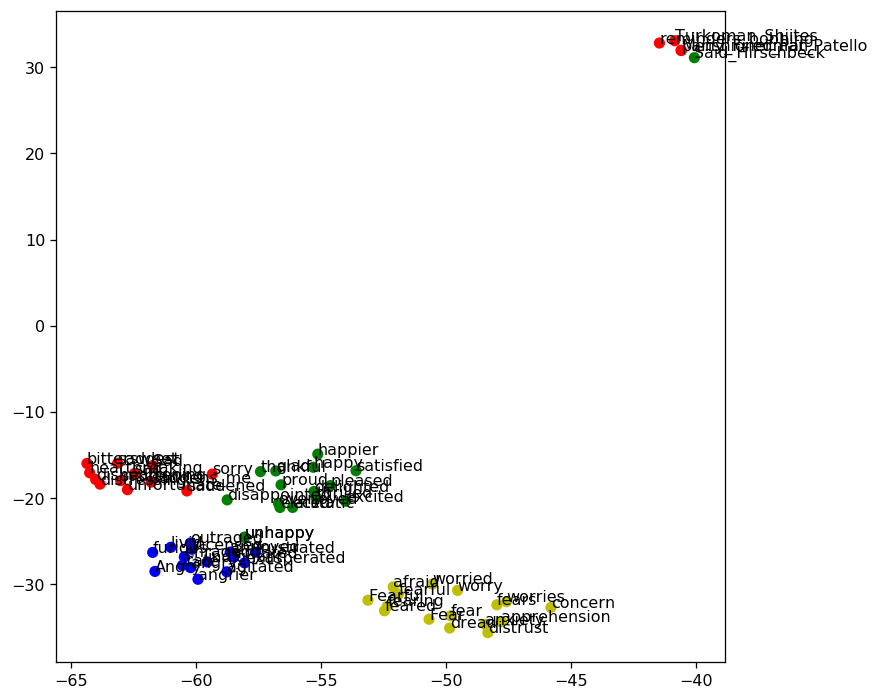

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# w2v model
model = w2v_google_model

# prepare training word vectors
size = 2000
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()